In [11]:
import pandas as pd
import numpy as np

f = "/home/nikolal/projects/parlaspeech/transcripts_normalized.txt"
df = pd.read_table(f, names=["unknown1", "path", "sentence"],
        #nrows=2000
        )

df["path"] = "/home/peterr/macocu/task6_speech/data/" + df.path.str.replace("flac/", "") + ".wav"

df = df.drop(columns="unknown1")
import os
df["filesize"] = df["path"].apply(os.path.getsize)
for char in ['*', ':', ';']:
    df["sentence"] = df.sentence.str.replace(char, "")
df.sort_values(by="filesize", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,path,sentence,filesize
0,/home/peterr/macocu/task6_speech/data/00009875...,znači žalili su se zbog dugotrajnosti rješavan...,3660878
1,/home/peterr/macocu/task6_speech/data/00018811...,formiranje nacionalne politike i kada mi danas...,2720078
2,/home/peterr/macocu/task6_speech/data/00006520...,ovakvo je to kretanje u dvanaest mjesecu dvije...,2579278
3,/home/peterr/macocu/task6_speech/data/00014693...,pa evo kolega paneniću vi ste spomenuli jedini...,2547278
4,/home/peterr/macocu/task6_speech/data/00007188...,dakle stav kluba hadezea je dakle da je ovo vr...,2387278


## How many files are over 1MB?

In [12]:
sum(df.filesize > 2**20)

617

How does the distribution of word counts look like?

In [29]:
df["wordcount"] = [len(s.split()) for s in df.sentence.values]
df.head()

,path,sentence,filesize,wordcount
0,/home/peterr/macocu/task6_speech/data/00009875...,znači žalili su se zbog dugotrajnosti rješavan...,3660878,198
1,/home/peterr/macocu/task6_speech/data/00018811...,formiranje nacionalne politike i kada mi danas...,2720078,146
2,/home/peterr/macocu/task6_speech/data/00006520...,ovakvo je to kretanje u dvanaest mjesecu dvije...,2579278,125
3,/home/peterr/macocu/task6_speech/data/00014693...,pa evo kolega paneniću vi ste spomenuli jedini...,2547278,161
4,/home/peterr/macocu/task6_speech/data/00007188...,dakle stav kluba hadezea je dakle da je ovo vr...,2387278,112


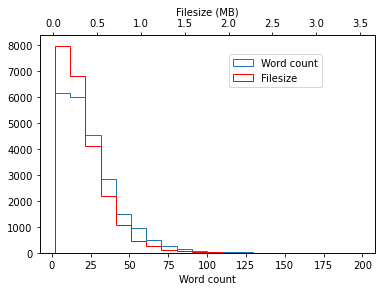

In [48]:
import matplotlib.pyplot as plt
# import plotext as plt

fig, ax = plt.subplots()
ax.hist(df.wordcount, bins=20, histtype="step", label="Word count", )
ax.set_xlabel("Word count")

ax2 = plt.twiny()
ax2.hist(df.filesize/2**20, bins=20, color="red", histtype="step", label="Filesize", )
ax2.set_xlabel("Filesize (MB)")

fig.legend(loc=(0.6, 0.7))
plt.savefig("images/histogram.png")
plt.show()